# Importing important libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette(sns.light_palette("seagreen",reverse=True))
seed=42

# Loading wine dataset from sklearn library

In [43]:
from sklearn.datasets import load_wine
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [44]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### Building the dataframe with the data and features names

In [45]:
X = pd.DataFrame(data= data['data'] ,columns=data['feature_names'])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [46]:
y = pd.Series(data['target'])
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

## Checking the balancing of the dataset

In [47]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

## So , Dataset seams balanced

# Train test split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

# Train Gaussian naive bays Model

In [49]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Plotting Decision boundaries

## To plot the decision boundaries we should select 2 features ,so we will select the best 2 features

### Showing the relation between features against target to select the best features

Text(0.5, 0.98, 'Pair plot to show the relation between features and target')

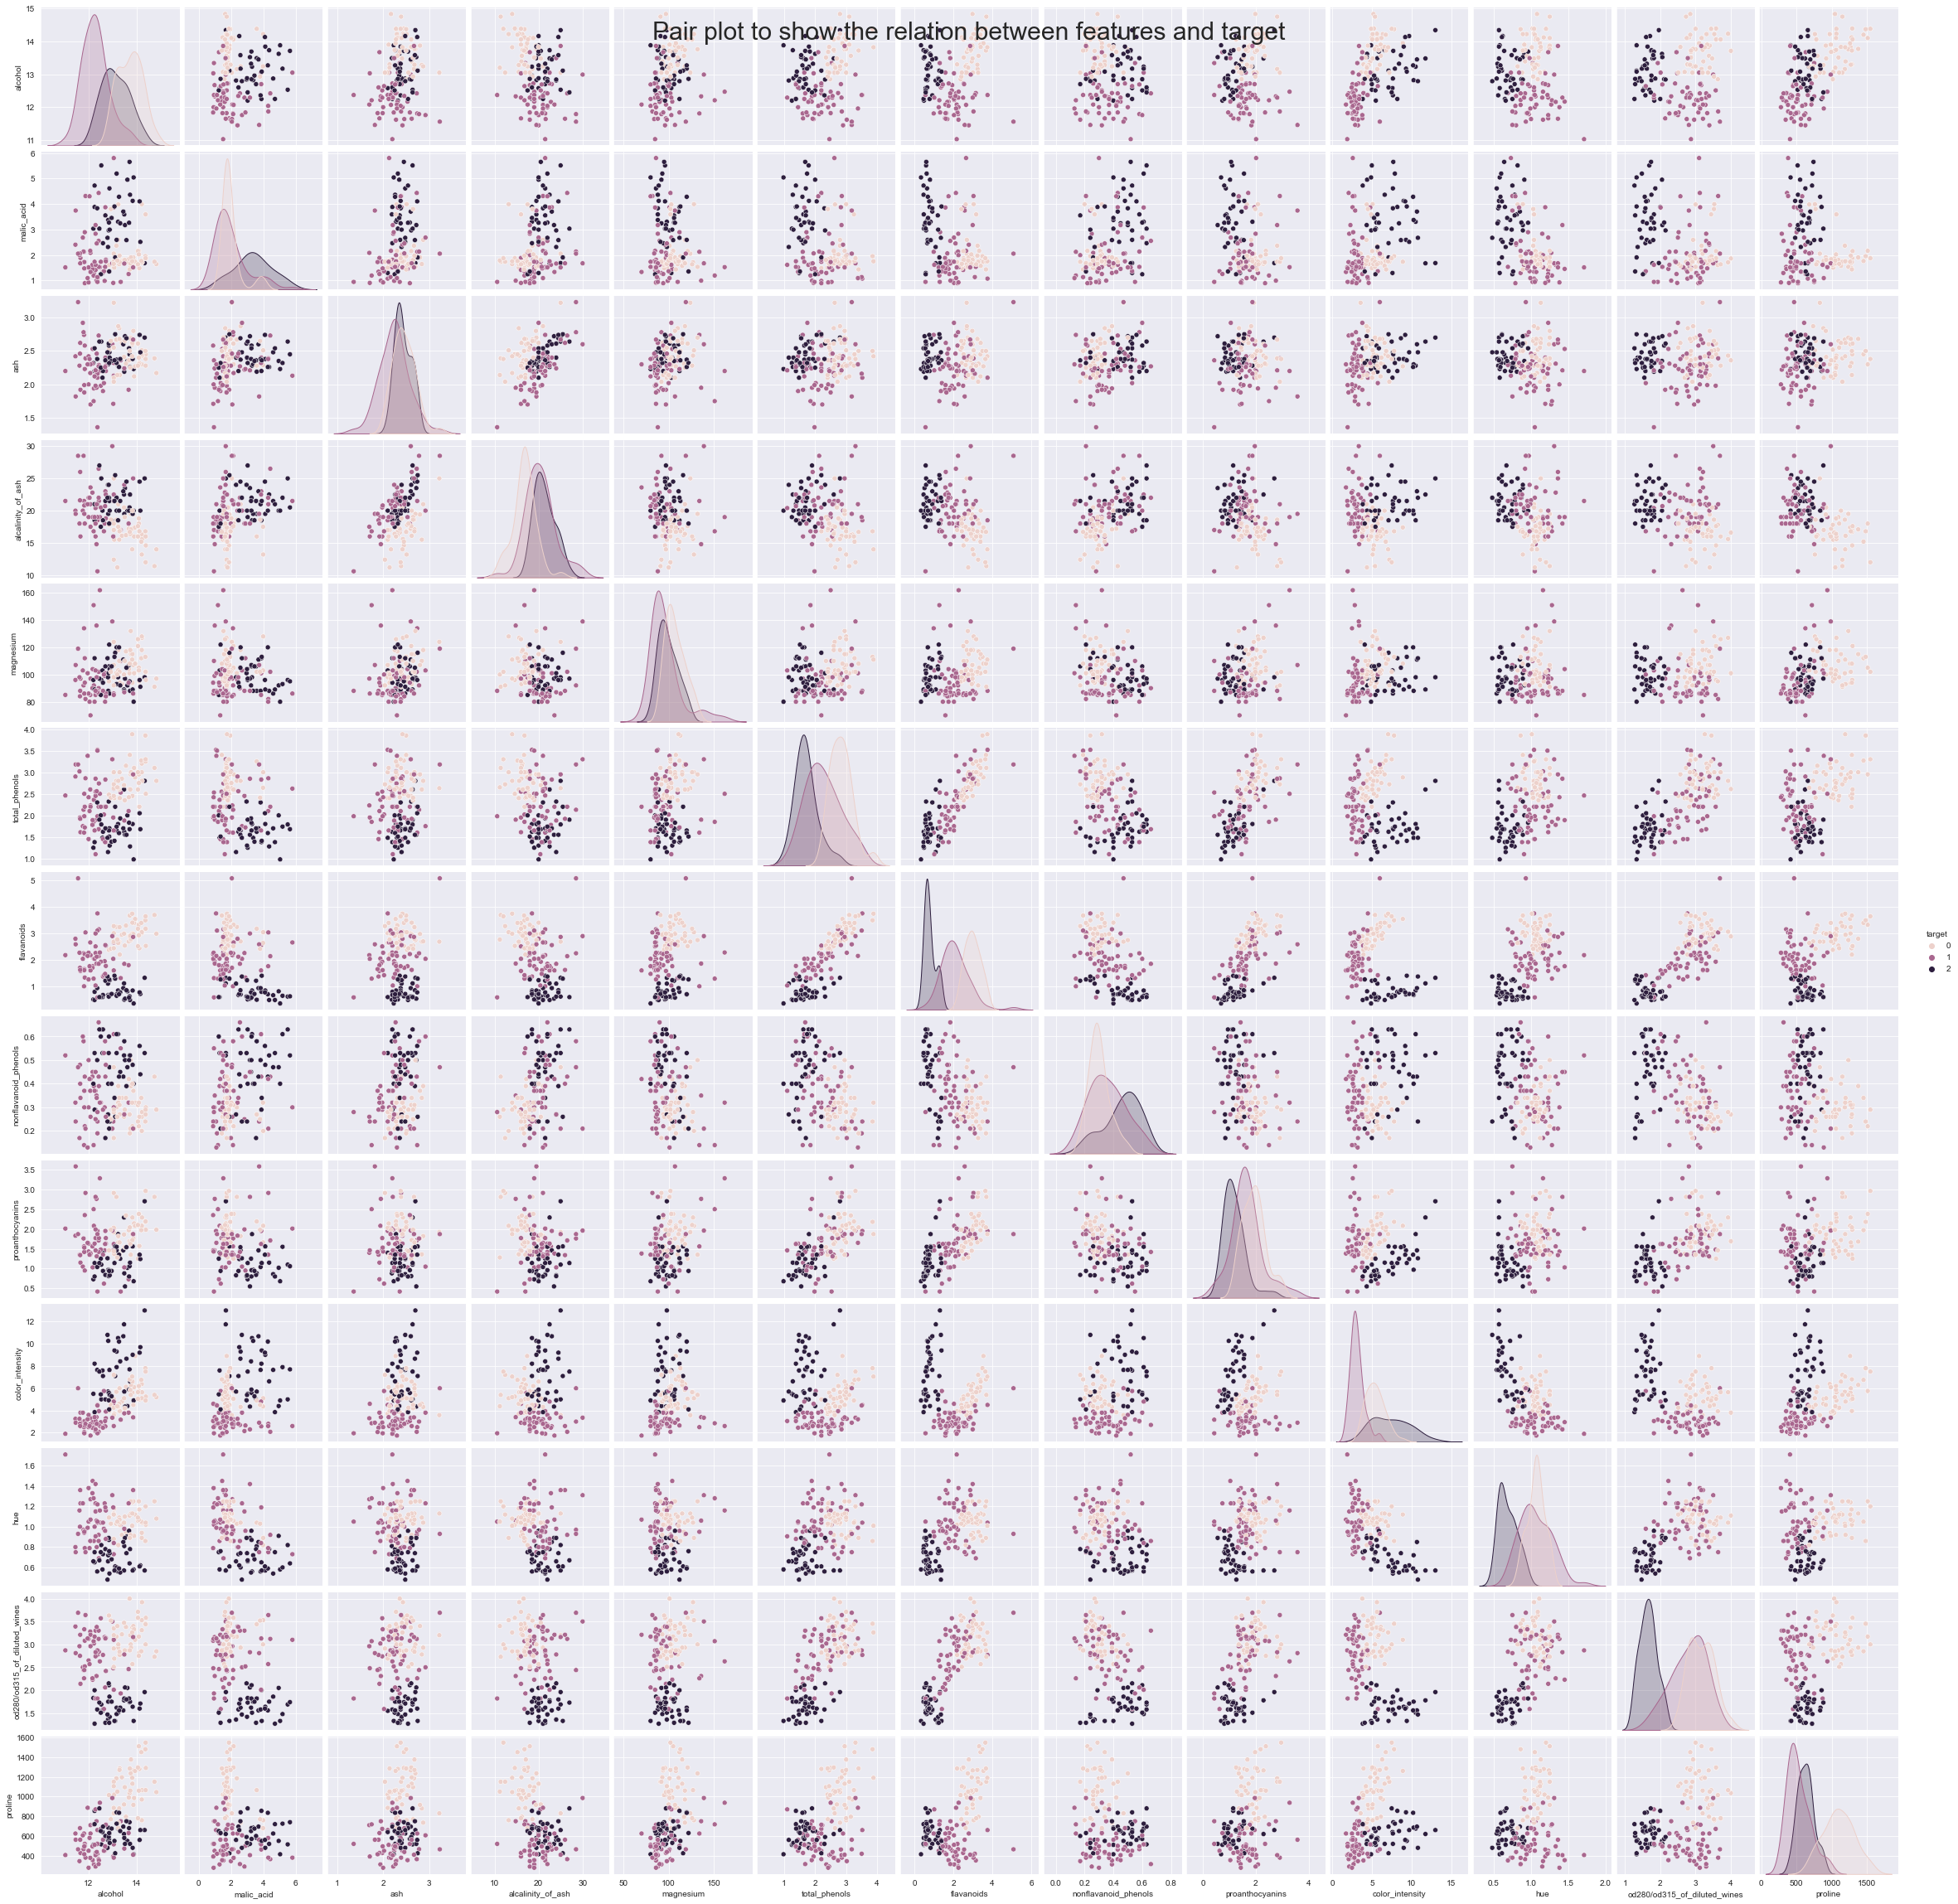

In [50]:
df_train = X_train.copy()
df_train['target'] = y_train
# sns.color_palette("Set2")
sns.color_palette("mako", as_cmap=True)
g=sns.pairplot(df_train, hue='target', diag_kind='kde')
g.fig.suptitle('Pair plot to show the relation between features and target',fontsize=30)

### According to this figure we can notice that these two features [color_intensity ,proline ] are linearly separable

### As a zoom in to the selected features

Text(0.5, 0.98, 'Pair plot of color_intensity and proline')

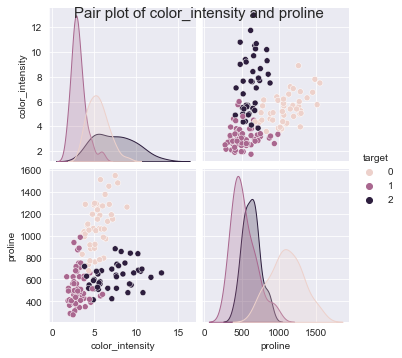

In [51]:
g=sns.pairplot(df_train[['color_intensity', 'proline','target']], hue='target', diag_kind='kde')
g.fig.suptitle('Pair plot of color_intensity and proline',fontsize=15)

## Using permutation importance

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

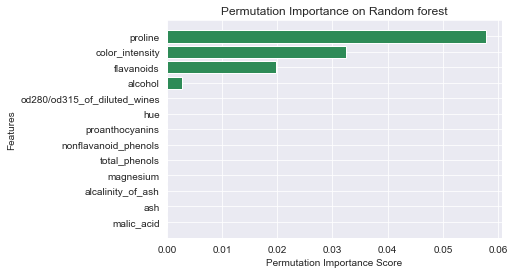

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
features_names = X_train.columns
features = np.array(features_names)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
perm_importance = permutation_importance(clf, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title('Permutation Importance on Random forest')
features_names

### Using Chi2 to get the best 2 features

chi2 values are [4.11585803e+00 2.27193343e+01 5.80353439e-01 2.63392652e+01
 3.01069360e+01 1.19287611e+01 5.10661187e+01 1.47348019e+00
 7.42600760e+00 8.82526332e+01 4.23336279e+00 2.00793682e+01
 1.20391084e+04]


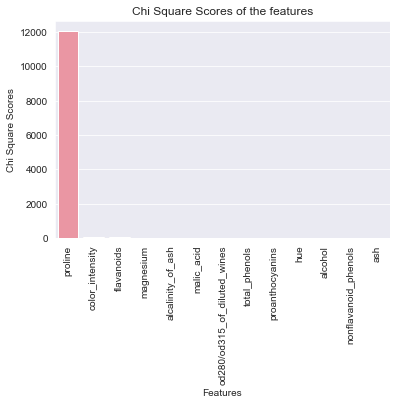

In [53]:
from sklearn.feature_selection import chi2
ch2,p_values = chi2(X_train,y_train)
import math
print(f"chi2 values are {ch2}")
chi_dict =dict()
for i in range(len(ch2)):
    chi_dict[X_train.columns[i]]=ch2[i]
s=dict(sorted(chi_dict.items(),key=lambda x:x[1],reverse=True))
s.values()
sns.barplot(x= list(s.keys()), y=list(s.values()))
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Chi Square Scores")
plt.title("Chi Square Scores of the features");

### Using Chi2, it chooses Color_intensoty and proline features

In [54]:
from sklearn.feature_selection import SelectKBest,chi2
select = SelectKBest(chi2, k=2)
z = select.fit_transform(X_train, y_train)
featrues_filter = select.get_support()
features = np.array(X_train.columns)
features[featrues_filter]

array(['color_intensity', 'proline'], dtype=object)

## Plotting Scatter plot to see the classification using our model and top selected features

<AxesSubplot:title={'center':'Scatter plot with 2 features and their predicted class'}, xlabel='color_intensity', ylabel='proline'>

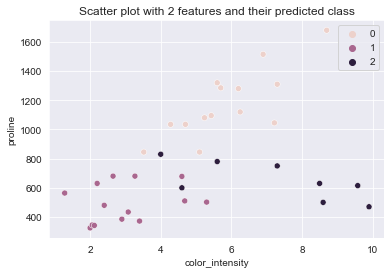

In [55]:
sns.color_palette("Set2")
plt.title('Scatter plot with 2 features and their predicted class')
sns.scatterplot(x=X_test['color_intensity'],y=X_test['proline'],hue=clf.predict(X_test))

## Plotting functions

In [56]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    # Predict all points of the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decition_boundries(clf,feature1,feature2,label):
  fig, ax = plt.subplots()
  # title for the plots with the name of the model
  title = ('Decision Boundry of '+ type(clf).__name__)

  x_range, y_range = make_meshgrid(feature1, feature2)
  
  plot_contours(ax, clf, x_range, y_range, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(feature1, feature2, c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('color_intensity')
  ax.set_xlabel('proline')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title('Decision Boundary of GaussianNB');

## Plotting decision boundaries using new model after trained with the selected features

C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


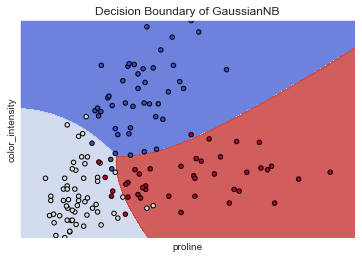

In [57]:
Selected_features = ['color_intensity','proline']
clf_2features = GaussianNB()
clf_2features.fit(X_train[Selected_features],y_train)
# y_pred = clf_2features.predict(X_train[Selected_features])
plot_decition_boundries(clf_2features,X_train[Selected_features[0]],X_train[Selected_features[1]],y_train);

# Part 2 Car Evaluation

### Load dataset

In [58]:
!gdown --id 1Ps5Zg8pgh9rsPaB4u1qHWhJoiuJ6LMnY

C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ps5Zg8pgh9rsPaB4u1qHWhJoiuJ6LMnY
To: D:\DEBI\Projects\Notebooks\Applied_ML\Assignment 2\car_evaluation.csv

  0%|          | 0.00/53.6k [00:00<?, ?B/s]
100%|##########| 53.6k/53.6k [00:00<00:00, 1.14MB/s]


In [59]:
car_df = pd.read_csv('car_evaluation.csv', names=['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety', 'decision'])
car_df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [60]:
car_df['number of doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: number of doors, dtype: int64

It's found that number of doors is object as it consists of strings instead of numbers,so we replaced the strings with numbers.

In [61]:
car_df.loc[car_df['number of doors'] == '5more', 'number of doors'] = 5

In [62]:
car_df['number of doors'] = car_df['number of doors'].astype('int')

We did the same to number of persons

In [63]:
car_df['number of persons'].value_counts()

2       576
4       576
more    576
Name: number of persons, dtype: int64

In [64]:
car_df.loc[car_df['number of persons'] == 'more', 'number of persons'] = 6

In [65]:
car_df['number of persons'] = car_df['number of persons'].astype('int')

### a)Shuffling and Splitting

In [66]:
from random import shuffle
df_shuffled = car_df.copy()
df_shuffled = df_shuffled.sample(frac=1,random_state=seed)
len(df_shuffled)

1728

In [67]:
X_train = df_shuffled.iloc[:1000,:-1]
y_train = df_shuffled.iloc[:1000,-1]
len(X_train)

1000

In [68]:
X_val = df_shuffled.iloc[1000:1300,:-1]
y_val = df_shuffled.iloc[1000:1300,-1]
len(X_val)

300

In [69]:
X_test = df_shuffled.iloc[1300:,:-1]
y_test = df_shuffled.iloc[1300:,-1]
len(X_test)

428

### b)Ordinal Encoder and Label Encoder

In [70]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 599 to 1126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   int32 
 3   number of persons  1728 non-null   int32 
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: int32(2), object(5)
memory usage: 94.5+ KB


### We applied label encoder for the target 'y' and ordinal encoder for the other features

In [71]:
lencoder = LabelEncoder()
y_train = lencoder.fit_transform(y_train)
y_val = lencoder.transform(y_val)
y_test = lencoder.transform(y_test)
y_train

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [72]:
numerical_features = ['number of doors','number of persons']
numerical_X_train = X_train[numerical_features]
categorical_X_train = X_train.drop(numerical_features,axis=1)
numerical_X_val = X_val[numerical_features]
categorical_X_val = X_val.drop(numerical_features,axis=1)
numerical_X_test = X_test[numerical_features]
categorical_X_test = X_test.drop(numerical_features,axis=1)
categorical_X_train

,buying price,maintenance cost,lug_boot,safety
599,high,high,med,high
1201,med,low,med,med
628,high,high,big,med
1498,low,high,med,med
1263,med,low,med,low
...,...,...,...,...
824,high,low,med,high
762,high,low,big,low
733,high,med,med,med
989,med,high,big,high


In [73]:
categories=[]
for col in categorical_X_train.columns:
    categories.append(categorical_X_train[col].unique().tolist())
categories

[['high', 'med', 'low', 'vhigh'],
 ['high', 'low', 'vhigh', 'med'],
 ['med', 'big', 'small'],
 ['high', 'med', 'low']]

In [74]:
enc = OrdinalEncoder(categories=[['low', 'med', 'high','vhigh'],
  ['low', 'med', 'high','vhigh'],
 ['small','med', 'big'],
 ['low','med', 'high']])
categorical_X_train = pd.DataFrame(enc.fit_transform(categorical_X_train),columns=categorical_X_train.columns,index=categorical_X_train.index)
categorical_X_val = pd.DataFrame(enc.transform(categorical_X_val),columns=categorical_X_val.columns,index=categorical_X_val.index)
categorical_X_test = pd.DataFrame(enc.transform(categorical_X_test),columns=categorical_X_test.columns,index=categorical_X_test.index)
categorical_X_train

,buying price,maintenance cost,lug_boot,safety
599,2.0,2.0,1.0,2.0
1201,1.0,0.0,1.0,1.0
628,2.0,2.0,2.0,1.0
1498,0.0,2.0,1.0,1.0
1263,1.0,0.0,1.0,0.0
...,...,...,...,...
824,2.0,0.0,1.0,2.0
762,2.0,0.0,2.0,0.0
733,2.0,1.0,1.0,1.0
989,1.0,2.0,2.0,2.0


In [75]:
X_train = np.append(categorical_X_train,numerical_X_train,axis=1)
X_val = np.append(categorical_X_val,numerical_X_val,axis=1)
X_test = np.append(categorical_X_test,numerical_X_test,axis=1)

In [76]:
X_train[:100,:]

array([[2., 2., 1., 2., 4., 2.],
       [1., 0., 1., 1., 2., 4.],
       [2., 2., 2., 1., 5., 2.],
       [0., 2., 1., 1., 5., 4.],
       [1., 0., 1., 0., 4., 6.],
       [1., 3., 1., 1., 4., 4.],
       [3., 3., 1., 2., 2., 6.],
       [2., 0., 2., 1., 5., 2.],
       [1., 3., 0., 1., 5., 6.],
       [2., 0., 2., 2., 2., 2.],
       [0., 2., 1., 2., 4., 6.],
       [1., 1., 0., 2., 5., 4.],
       [3., 0., 0., 2., 2., 6.],
       [3., 0., 2., 2., 5., 2.],
       [2., 3., 2., 2., 4., 2.],
       [3., 1., 0., 1., 5., 2.],
       [2., 3., 2., 1., 5., 4.],
       [0., 0., 0., 2., 3., 2.],
       [1., 0., 0., 2., 2., 2.],
       [0., 2., 1., 1., 5., 6.],
       [2., 2., 2., 2., 2., 2.],
       [3., 0., 0., 2., 3., 6.],
       [0., 3., 2., 2., 3., 4.],
       [2., 1., 2., 1., 5., 2.],
       [3., 1., 0., 2., 3., 4.],
       [2., 0., 0., 1., 4., 6.],
       [2., 3., 0., 2., 3., 6.],
       [3., 1., 0., 0., 5., 2.],
       [1., 0., 1., 2., 2., 2.],
       [2., 2., 2., 2., 4., 2.],
       [1.

In [77]:
y_train[:100].shape

(100,)

### C) Evaluating the KNN classifier by using different size of training data and different K number.

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Using different training data sizes and evaluate the performance of validation and testing sets

In [79]:
acc_dict_val = dict()
acc_dict_test = dict()
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(X_train[:i*100,:],y_train[:i*100])
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    acc_dict_val[f'{i*10}%'] = accuracy_score(y_val,y_val_pred)
    acc_dict_test[f'{i*10}%'] = accuracy_score(y_test,y_test_pred)
print('Testing accuracy',acc_dict_test)
print('Validation accuracy',acc_dict_val)

Testing accuracy {'10%': 0.6939252336448598, '20%': 0.7546728971962616, '30%': 0.7710280373831776, '40%': 0.7616822429906542, '50%': 0.7710280373831776, '60%': 0.7920560747663551, '70%': 0.794392523364486, '80%': 0.8084112149532711, '90%': 0.8154205607476636, '100%': 0.7967289719626168}
Validation accuracy {'10%': 0.6866666666666666, '20%': 0.7333333333333333, '30%': 0.77, '40%': 0.7933333333333333, '50%': 0.7933333333333333, '60%': 0.82, '70%': 0.8366666666666667, '80%': 0.8433333333333334, '90%': 0.8666666666666667, '100%': 0.8533333333333334}


Text(0, 0.5, 'Scores')

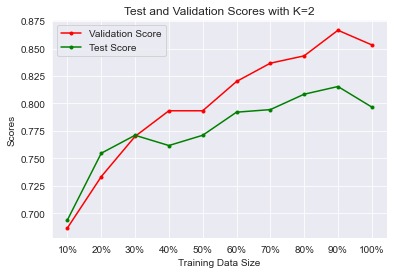

In [82]:
plt.plot(list(acc_dict_val.keys()),list(acc_dict_val.values()),marker='.', color='r', label= 'Validation Score')
plt.plot(list(acc_dict_val.keys()),list(acc_dict_test.values()), marker = '.', color = 'g',label = 'Test Score')
plt.legend()
plt.title("Test and Validation Scores with K=2")
plt.xlabel('Training Data Size')
plt.ylabel('Scores')

### D) Evaluating the KNN clssifier by changing the K values from 1 to 10

In [81]:
acc_dict_kval = dict()
for k in range (1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_val_pred = model.predict(X_val)
    acc_dict_kval[f'{k}'] = accuracy_score(y_val,y_val_pred)
acc_dict_kval

{'1': 0.84,
 '2': 0.8533333333333334,
 '3': 0.9233333333333333,
 '4': 0.9,
 '5': 0.93,
 '6': 0.9033333333333333,
 '7': 0.9233333333333333,
 '8': 0.9033333333333333,
 '9': 0.9266666666666666,
 '10': 0.9333333333333333}

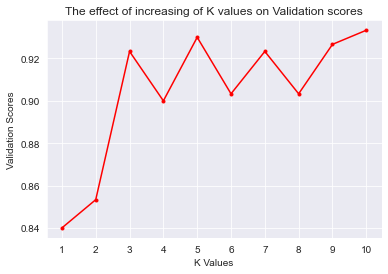

In [83]:
plt.plot(list(acc_dict_kval.keys()),list(acc_dict_kval.values()),marker='.', color='r', label= 'Validation Score');
plt.ylabel('Validation Scores');
plt.xlabel('K Values');
plt.title('The effect of increasing of K values on Validation scores');

### E) Analyzing the training time and testing time when using different numbers of training samples when k =2 and k=10 and using the full training data and with only 10% of it

In [260]:
import time
from datetime import datetime as dt
#For K = 2
time_train_k2 = dict()
time_train_k10 = dict()
time_test_k2 = dict()
time_test_k10 = dict()
models = [KNeighborsClassifier(n_neighbors=2),KNeighborsClassifier(n_neighbors=10)]
for model in models:
    for portion in [1,10]:
        time_1 = dt.now()
        model.fit(X_train[:portion*100,:],y_train[:portion*100])
        time_2 = dt.now()
        time_test_1 = dt.now()
        model.predict(X_test)
        time_test_2 = dt.now()
        if (model.n_neighbors == 2):
            time_train_k2[f'{portion * 10}%'] = (time_2 - time_1).microseconds
            time_test_k2[f'{portion * 10}%'] = (time_test_2 - time_test_1).microseconds
        else:
            time_train_k10[f'{portion * 10}%'] = (time_2 - time_1).microseconds
            time_test_k10[f'{portion * 10}%'] = (time_test_2 - time_test_1).microseconds

In [261]:
time_train_k2.values(), time_train_k10.values()

(dict_values([995, 3988]), dict_values([995, 2988]))

In [262]:
time_train_df = pd.DataFrame({'Number of neighbours':[2, 2, 10, 10], 'Time in Microseconds': list(time_train_k2.values()) + list(time_train_k10.values()), 'Sample Portion': list(time_train_k2.keys()) + list(time_train_k10.keys())})
time_test_df = pd.DataFrame({'Number of neighbours':[2, 2, 10, 10], 'Time in Microseconds': list(time_test_k2.values()) + list(time_test_k10.values()), 'Sample Portion': list(time_test_k2.keys()) + list(time_test_k10.keys())})

In [263]:
time_train_df

,Number of neighbours,Time in Microseconds,Sample Portion
0,2,995,10%
1,2,3988,100%
2,10,995,10%
3,10,2988,100%


Text(0.5, 1.0, 'Training Time')

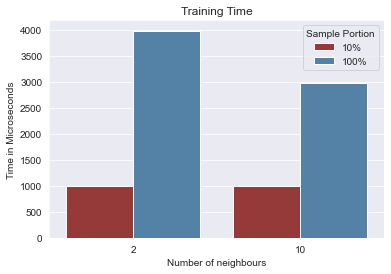

In [264]:
sns.barplot(x="Number of neighbours", y="Time in Microseconds", hue="Sample Portion", data=time_train_df, palette=['brown', 'steelblue']);
plt.title('Training Time')

### Training Time with Larger data is more than with lower data and that is make sense,also when k is small the time increased

Text(0.5, 1.0, 'Testing Time')

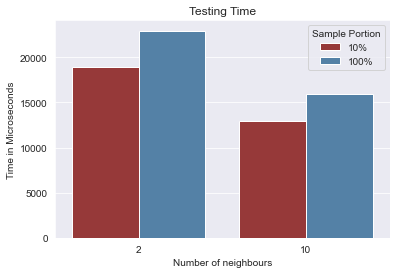

In [265]:
sns.barplot(x="Number of neighbours", y="Time in Microseconds", hue="Sample Portion", data=time_test_df, palette=['brown', 'steelblue']);
plt.title('Testing Time')

## Conclusion

#### Regarding question (c)when we used 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, and 100% of the training set for 10 separate KNN we found that the accuracy increases when the dataset increases.
#### Regarding question (e)when we tried different values of k we found that the best k=5.
#### Regarding question (d) after analyzing the training time and testing time we found that the more the dataset size, the more time required.
